# 파이썬 머신러닝 판다스 데이터분석
## Part 6. 데이터프레임의 다양한 응용

### <span style="color:red">Series와 DataFrame에 함수 적용하기</span>
#### map, apply 함수 : Series에서 사용 가능하며 모든 요소에 함수 일괄 적용
#### apply 함수 : DataFrame에서 사용 가능하며 각각의 행 또는 열(Series)에 함수 일괄 적용
#### applymap 함수 : DataFrame에서 사용하며 모든 요소에 함수 일괄 적용

In [1]:
# 예제 6-1
import seaborn as sns

# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
df['ten'] = 10
print(df.head())
print('\n')

# 사용자 함수 정의
def add_10(n):   # 10을 더하는 함수
    return n + 10

def add_two_obj(a, b):    # 두 객체의 합
    return a + b

print(add_10(10))
print(add_two_obj(10, 10))
print('\n')

# 시리즈 객체에 적용
sr1 = df['age'].apply(add_10)               # n = df['age']의 모든 원소
print(sr1.head())
print('\n')
  
# 시리즈 객체와 숫자에 적용 : 2개의 인수(시리즈 + 숫자)
sr2 = df['age'].apply(add_two_obj, b=10)    # a=df['age']의 모든 원소, b=10
print(sr2.head())
print('\n')

# 람다 함수 활용: 시리즈 객체에 적용
sr3 = df['age'].apply(lambda x: add_10(x))  # x=df['age']
print(sr3.head())


    age     fare  ten
0  22.0   7.2500   10
1  38.0  71.2833   10
2  26.0   7.9250   10
3  35.0  53.1000   10
4  35.0   8.0500   10


20
20


0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64


0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64


0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64


In [2]:
# 예제 6-2
import seaborn as sns

# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
print(df.head())
print('\n')

# 사용자 함수 정의
def add_10(n):   # 10을 더하는 함수
    return n + 10
    
# 데이터프레임에 applymap()으로 add_10() 함수를 매핑 적용
df_map = df.applymap(add_10)   
print(df_map.head())


    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


    age     fare
0  32.0  17.2500
1  48.0  81.2833
2  36.0  17.9250
3  45.0  63.1000
4  45.0  18.0500


In [3]:
# 예제 6-3
import seaborn as sns

# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
print(df.head())
print('\n')

# 사용자 함수 정의
def missing_value(series):    # 시리즈를 인수로 전달
    return series.isnull()    # 불린 시리즈를 반환
    
# 데이터프레임의 각 열을 인수로 전달하면 데이터프레임을 반환
result = df.apply(missing_value, axis=0)  
print(result.head())
print('\n')
print(type(result))

    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


     age   fare
0  False  False
1  False  False
2  False  False
3  False  False
4  False  False


<class 'pandas.core.frame.DataFrame'>


In [4]:
# 예제 6-4
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
print(df.head())
print('\n')

# 사용자 함수 정의
def min_max(x):    # 최대값 - 최소값
    return x.max() - x.min()
    
# 데이터프레임의 각 열을 인수로 전달하면 시리즈를 반환
result = df.apply(min_max)   #기본값 axis=0 
print(result)
print('\n')
print(type(result))

    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


age      79.5800
fare    512.3292
dtype: float64


<class 'pandas.core.series.Series'>


In [5]:
# 예제 6-5
import seaborn as sns

# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
df['ten'] = 10
print(df.head())
print('\n')

# 사용자 함수 정의
def add_two_obj(a, b):    # 두 객체의 합
    return a + b
    
# 데이터프레임의 2개 열을 선택하여 적용
# x=df, a=df['age'], b=df['ten']
df['add'] = df.apply(lambda x: add_two_obj(x['age'], x['ten']), axis=1)   
print(df.head())

    age     fare  ten
0  22.0   7.2500   10
1  38.0  71.2833   10
2  26.0   7.9250   10
3  35.0  53.1000   10
4  35.0   8.0500   10


    age     fare  ten   add
0  22.0   7.2500   10  32.0
1  38.0  71.2833   10  48.0
2  26.0   7.9250   10  36.0
3  35.0  53.1000   10  45.0
4  35.0   8.0500   10  45.0


In [7]:
# 예제 6-6
import seaborn as sns

# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]

# 각 열의 NaN 찾기 - 데이터프레임 전달하면 데이터프레임을 반환
def missing_value(x):    
    return x.isnull()    

# 각 열의 NaN 개수 반환 - 데이터프레임 전달하면 시리즈 반환
def missing_count(x):    # 
    return missing_value(x).sum()

# 데이터프레임의 총 NaN 개수 - 데이터프레임 전달하면 값을 반환
def totoal_number_missing(x):    
    return missing_count(x).sum()
    
# 데이터프레임에 pipe() 메소드로 함수 매핑
result_df = df.pipe(missing_value)   
print(result_df.head())
print(type(result_df))
print('\n')

result_series = df.pipe(missing_count)   
print(result_series)
print(type(result_series))
print('\n')

# result_value = df.pipe(totoal_number_missing)   
# print(result_value)
# print(type(result_value))

     age   fare
0  False  False
1  False  False
2  False  False
3  False  False
4  False  False
<class 'pandas.core.frame.DataFrame'>


age     177
fare      0
dtype: int64
<class 'pandas.core.series.Series'>




In [7]:
import pandas as pd # 추가할것
df = pd.DataFrame({'a': [10, 20, 30], 'b': [20, 30, 40]}) 
display(df)

,a,b
0,10,20
1,20,30
2,30,40


In [8]:
def print_me(x): 
    print("\n")
    print("***"+str(x)+"***")
    print("\n")

In [9]:
print(df.apply(print_me, axis=0))



***0    10
1    20
2    30
Name: a, dtype: int64***




***0    20
1    30
2    40
Name: b, dtype: int64***


a    None
b    None
dtype: object


In [10]:
print(df.apply(print_me, axis=1))



***a    10
b    20
Name: 0, dtype: int64***




***a    20
b    30
Name: 1, dtype: int64***




***a    30
b    40
Name: 2, dtype: int64***


0    None
1    None
2    None
dtype: object


In [11]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [12]:
import numpy as np

def count_missing(vec):
    null_vec = pd.isnull(vec)
    null_count = np.sum(null_vec)
    return null_count

In [13]:
cmis_col = titanic.apply(count_missing)
print(cmis_col)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [14]:
def prop_missing(vec):
    num = count_missing(vec)
    dem = vec.size
    return num / dem

In [15]:
pmis_col = titanic.apply(prop_missing)
print(pmis_col)

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64


### 시리즈객체.map(함수)
<img src='images/map.jpg' width=400 height=300>

### 데이터프레임객체.applymap(함수)
<img src='images/applymap.jpg' width=400 height=300>

### 시리즈객체.apply(함수), 데이터프레임객체.apply(함수, axis=0 또는 1)
<img src='images/apply.jpg' width=400 height=300>

In [12]:
# 예제 6-7
import seaborn as sns

# titanic 데이터셋의 부분을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[0:4, 'survived':'age']
print(df, '\n')

# 열 이름의 리스트 만들기
columns = list(df.columns.values)   #기존 열 이름
print(columns, '\n')

# 열 이름을 알파벳 순으로 정렬하기
columns_sorted = sorted(columns)    #알파벳 순으로 정렬
df_sorted = df[columns_sorted]
print(df_sorted, '\n')

# 열 이름을 기존 순서의 정반대 역순으로 정렬하기
columns_reversed = list(reversed(columns))  
df_reversed = df[columns_reversed]
print(df_reversed, '\n')

# 열 이름을 사용자가 정의한 임의의 순서로 재배치하기
columns_customed = ['pclass', 'sex', 'age', 'survived']  
df_customed = df[columns_customed]
print(df_customed)


   survived  pclass     sex   age
0         0       3    male  22.0
1         1       1  female  38.0
2         1       3  female  26.0
3         1       1  female  35.0
4         0       3    male  35.0 

['survived', 'pclass', 'sex', 'age'] 

    age  pclass     sex  survived
0  22.0       3    male         0
1  38.0       1  female         1
2  26.0       3  female         1
3  35.0       1  female         1
4  35.0       3    male         0 

    age     sex  pclass  survived
0  22.0    male       3         0
1  38.0  female       1         1
2  26.0  female       3         1
3  35.0  female       1         1
4  35.0    male       3         0 

   pclass     sex   age  survived
0       3    male  22.0         0
1       1  female  38.0         1
2       3  female  26.0         1
3       1  female  35.0         1
4       3    male  35.0         0


In [18]:
# 예제 6-8
import pandas as pd

# 데이터셋 가져오기
df = pd.read_excel('./data/주가데이터.xlsx')
print(df.head(), '\n')
print(df.dtypes, '\n')

# # 연, 월, 일 데이터 분리하기
df['연월일'] = df['연월일'].astype('str')   # 문자열 메소드 사용을 자료형 변경
print(df.head(), '\n')
dates = df['연월일'].str.split('-')        # 문자열을 split() 메서드로 분리
print(dates.head(), '\n')
print(type(dates.str))

# 분리된 정보를 각각 새로운 열에 담아서 df에 추가하기
df['연'] = dates.str.get(0)     # dates 변수의 원소 리스트의 0번째 인덱스 값
df['월'] = dates.str.get(1)     # dates 변수의 원소 리스트의 1번째 인덱스 값 
df['일'] = dates.str.get(2)     # dates 변수의 원소 리스트의 2번째 인덱스 값
display(df.head())

         연월일   당일종가  전일종가     시가     고가     저가     거래량
0 2018-07-02  10100   600  10850  10900  10000  137977
1 2018-06-29  10700   300  10550  10900   9990  170253
2 2018-06-28  10400   500  10900  10950  10150  155769
3 2018-06-27  10900   100  10800  11050  10500  133548
4 2018-06-26  10800   350  10900  11000  10700   63039 

연월일     datetime64[ns]
당일종가             int64
전일종가             int64
시가               int64
고가               int64
저가               int64
거래량              int64
dtype: object 

          연월일   당일종가  전일종가     시가     고가     저가     거래량
0  2018-07-02  10100   600  10850  10900  10000  137977
1  2018-06-29  10700   300  10550  10900   9990  170253
2  2018-06-28  10400   500  10900  10950  10150  155769
3  2018-06-27  10900   100  10800  11050  10500  133548
4  2018-06-26  10800   350  10900  11000  10700   63039 

0    [2018, 07, 02]
1    [2018, 06, 29]
2    [2018, 06, 28]
3    [2018, 06, 27]
4    [2018, 06, 26]
Name: 연월일, dtype: object 

<class 'pandas.core.string

,연월일,당일종가,전일종가,시가,고가,저가,거래량,연,월,일
0,2018-07-02,10100,600,10850,10900,10000,137977,2018,07,02
1,2018-06-29,10700,300,10550,10900,9990,170253,2018,06,29
2,2018-06-28,10400,500,10900,10950,10150,155769,2018,06,28
3,2018-06-27,10900,100,10800,11050,10500,133548,2018,06,27
4,2018-06-26,10800,350,10900,11000,10700,63039,2018,06,26


In [21]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.array(([1, 2, 3], [4, 5, 6])),
                  index=['mouse', 'rabbit'],
                  columns=['one', 'two', 'three'])

df

,one,two,three
mouse,1,2,3
rabbit,4,5,6


In [22]:
df.filter(items=['one', 'three'])

,one,three
mouse,1,3
rabbit,4,6


In [23]:
df.filter(regex='e$', axis=1)

,one,three
mouse,1,3
rabbit,4,6


In [24]:
df.filter(regex='t$', axis=0)

,one,two,three
rabbit,4,5,6


In [25]:
df.filter(like='bbi', axis=0)

,one,two,three
rabbit,4,5,6


In [26]:
df.filter(like='e', axis=1)

,one,three
mouse,1,3
rabbit,4,6


In [27]:
df.loc[[True,True], :]

,one,two,three
mouse,1,2,3
rabbit,4,5,6


In [28]:
df.loc[[True,False], :]

,one,two,three
mouse,1,2,3


In [26]:
df.loc[[False, False], :]

,one,two,three


In [29]:
df.loc[df.one > 2, :]

,one,two,three
rabbit,4,5,6


In [28]:
df.loc[(df.one > 2) & (df.three > 2), :]

,one,two,three
rabbit,4,5,6


In [29]:
df.loc[(df.one < 5) | (df.three > 2), :]

,one,two,three
mouse,1,2,3
rabbit,4,5,6


In [33]:
# 예제 6-9
import seaborn as sns

# titanic 데이터셋 로딩
titanic = sns.load_dataset('titanic')

# 나이가 10대(10~19세)인 승객만 따로 선택
mask1 = (titanic.age >= 10) & (titanic.age < 20)
df_teenage = titanic.loc[mask1, :]
print(df_teenage.head())
print('\n')

# 나이가 10세 미만(0~9세)이고 여성인 승객만 따로 선택
mask2 = (titanic.age < 10) & (titanic.sex == 'female')
df_female_under10 = titanic.loc[mask2, :]
print(df_female_under10.head())
print('\n')

# 나이가 10세 미만(0~9세) 또는 60세 이상인 승객의 age, sex, alone 열만 선택
mask3 = (titanic.age < 10) | (titanic.age >= 60)
df_under10_morethan60 = titanic.loc[mask3, ['age', 'sex', 'alone']]
print(df_under10_morethan60.head())

    survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
9          1       2  female  14.0      1      0   30.0708        C  Second   
14         0       3  female  14.0      0      0    7.8542        S   Third   
22         1       3  female  15.0      0      0    8.0292        Q   Third   
27         0       1    male  19.0      3      2  263.0000        S   First   
38         0       3  female  18.0      2      0   18.0000        S   Third   

      who  adult_male deck  embark_town alive  alone  
9   child       False  NaN    Cherbourg   yes  False  
14  child       False  NaN  Southampton    no   True  
22  child       False  NaN   Queenstown   yes   True  
27    man        True    C  Southampton    no  False  
38  woman       False  NaN  Southampton    no  False  


     survived  pclass     sex  age  sibsp  parch     fare embarked   class  \
10          1       3  female  4.0      1      1  16.7000        S   Third   
24          0       3  female  8.0   

### 시리즈객체.isin(리스트)
<img src='images/isin.jpg' width=500 height=400>

In [37]:
# 예제 6-10
import seaborn as sns
import pandas as pd

# titanic 데이터셋 로딩
titanic = sns.load_dataset('titanic')

# IPyhton 디스플레이 설정 변경 - 출력할 최대 열의 개수
pd.set_option('display.max_columns', 10)  
    
# 함께 탑승한 형제 또는 배우자의 수가 3, 4, 5인 승객만 따로 추출 - 불린 인덱싱
mask3 = titanic['sibsp'] == 3
mask4 = titanic['sibsp'] == 4
mask5 = titanic['sibsp'] == 5
df_boolean = titanic[mask3 | mask4 | mask5]
print(df_boolean.head())
print('\n')

# isin() 메서드 활용하여 동일한 조건으로 추출
isin_filter = titanic['sibsp'].isin([3, 4, 5])
df_isin = titanic[isin_filter]
print(df_isin.head())


    survived  pclass     sex   age  sibsp  ...  adult_male  deck  embark_town  \
7          0       3    male   2.0      3  ...       False   NaN  Southampton   
16         0       3    male   2.0      4  ...       False   NaN   Queenstown   
24         0       3  female   8.0      3  ...       False   NaN  Southampton   
27         0       1    male  19.0      3  ...        True     C  Southampton   
50         0       3    male   7.0      4  ...       False   NaN  Southampton   

   alive  alone  
7     no  False  
16    no  False  
24    no  False  
27    no  False  
50    no  False  

[5 rows x 15 columns]


    survived  pclass     sex   age  sibsp  ...  adult_male  deck  embark_town  \
7          0       3    male   2.0      3  ...       False   NaN  Southampton   
16         0       3    male   2.0      4  ...       False   NaN   Queenstown   
24         0       3  female   8.0      3  ...       False   NaN  Southampton   
27         0       1    male  19.0      3  ...        Tr

In [42]:
df1 = pd.DataFrame({'key': ['a','b','c','f'], 
                    'c1':[1,2,3,5]})
df2 = pd.DataFrame({'key': ['a','b','d','f'],
                    'c2':[5,6,7,8]})

In [43]:
df1.merge(df2)

,key,c1,c2
0,a,1,5
1,b,2,6
2,f,5,8


In [44]:
df1.merge(df2, how='left')

,key,c1,c2
0,a,1,5.0
1,b,2,6.0
2,c,3,NaN
3,f,5,8.0


In [35]:
df1.merge(df2, how='right')

,key,c1,c2
0,a,1.0,5
1,b,2.0,6
2,d,NaN,7
3,f,5.0,8


In [36]:
df1.merge(df2, how="outer")

,key,c1,c2
0,a,1.0,5.0
1,b,2.0,6.0
2,c,3.0,NaN
3,f,5.0,8.0
4,d,NaN,7.0


In [37]:
df3 = pd.DataFrame({'key3': ['a','b','c','f'],
                    'c1':[1,2,3,5]})
df4 = pd.DataFrame({'key4': ['a','b','d','f'],
                    'c2':[5,6,7,8]})

In [38]:
df3.merge(df4, left_on='key3', right_on='key4')

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,f,5,f,8


In [39]:
df3.merge(df4, left_index=True, right_index=True)

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,d,7
3,f,5,f,8


In [40]:
df1 = pd.DataFrame({'c1': [1,2,3,4], 'c2': [5,6,7,8]})
df2 = pd.DataFrame({'c3': ['a','b','c','d'],
                    'c4': [1.2,3.4,5.5,7.6]})

In [41]:
pd.concat([df1,df2], axis=1)

,c1,c2,c3,c4
0,1,5,a,1.2
1,2,6,b,3.4
2,3,7,c,5.5
3,4,8,d,7.6


In [40]:
pd.concat([df1,df2], axis=0)

,key,c1,c2
0,a,1.0,NaN
1,b,2.0,NaN
2,c,3.0,NaN
3,f,5.0,NaN
0,a,NaN,5.0
1,b,NaN,6.0
2,d,NaN,7.0
3,f,NaN,8.0


In [43]:
df1 = pd.DataFrame({'c1': [1,2,3,4], 
                    'c2': [5,6,7,8]},
                   index=[0,2,4,6])
df2 = pd.DataFrame({'c3': ['a','b','c','d'],
                    'c4': [1.2,3.4,5.5,7.6]},
                   index=[0,1,2,3])

In [44]:
pd.concat([df1, df2], axis=1)

,c1,c2,c3,c4
0,1.0,5.0,a,1.2
2,2.0,6.0,c,5.5
4,3.0,7.0,NaN,NaN
6,4.0,8.0,NaN,NaN
1,NaN,NaN,b,3.4
3,NaN,NaN,d,7.6


In [46]:
# 예제 6-11
import pandas as pd

# 데이터프레임 만들기
df1 = pd.DataFrame({'a': ['a0', 'a1', 'a2', 'a3'],
                    'b': ['b0', 'b1', 'b2', 'b3'],
                    'c': ['c0', 'c1', 'c2', 'c3']},
                    index=[0, 1, 2, 3])
 
df2 = pd.DataFrame({'a': ['a2', 'a3', 'a4', 'a5'],
                    'b': ['b2', 'b3', 'b4', 'b5'],
                    'c': ['c2', 'c3', 'c4', 'c5'],
                    'd': ['d2', 'd3', 'd4', 'd5']},
                    index=[2, 3, 4, 5])

print(df1, '\n')
print(df2, '\n')

# 2개의 데이터프레임을 위 아래 행 방향으로 이어 붙이듯 연결하기 
result1 = pd.concat([df1, df2])
print(result1, '\n')


    a   b   c
0  a0  b0  c0
1  a1  b1  c1
2  a2  b2  c2
3  a3  b3  c3 

    a   b   c   d
2  a2  b2  c2  d2
3  a3  b3  c3  d3
4  a4  b4  c4  d4
5  a5  b5  c5  d5 

    a   b   c    d
0  a0  b0  c0  NaN
1  a1  b1  c1  NaN
2  a2  b2  c2  NaN
3  a3  b3  c3  NaN
2  a2  b2  c2   d2
3  a3  b3  c3   d3
4  a4  b4  c4   d4
5  a5  b5  c5   d5 



In [53]:
# ignore_index=True 옵션 설정하기 
result2 = pd.concat([df1, df2], ignore_index=True)
print(result2, '\n')

# 2개의 데이터프레임을 좌우 열 방향으로 이어 붙이듯 연결하기 
result3 = pd.concat([df1, df2], axis=1)
print(result3, '\n')

# join='inner' 옵션 적용하기(교집합)
result3_in = pd.concat([df1, df2], axis=1, join='inner')
print(result3_in, '\n')

# 시리즈 만들기
sr1 = pd.Series(['e0', 'e1', 'e2', 'e3'], name='e')
sr2 = pd.Series(['f0', 'f1', 'f2'], name='f', index=[3, 4, 5])
sr3 = pd.Series(['g0', 'g1', 'g2', 'g3'], name='g')

# df1과 sr1을 좌우 열 방향으로 연결하기
result4 = pd.concat([df1, sr1], axis=1)
print(result4, '\n')

    a   b   c    d
0  a0  b0  c0  NaN
1  a1  b1  c1  NaN
2  a2  b2  c2  NaN
3  a3  b3  c3  NaN
4  a2  b2  c2   d2
5  a3  b3  c3   d3
6  a4  b4  c4   d4
7  a5  b5  c5   d5 

     a    b    c    a    b    c    d
0   a0   b0   c0  NaN  NaN  NaN  NaN
1   a1   b1   c1  NaN  NaN  NaN  NaN
2   a2   b2   c2   a2   b2   c2   d2
3   a3   b3   c3   a3   b3   c3   d3
4  NaN  NaN  NaN   a4   b4   c4   d4
5  NaN  NaN  NaN   a5   b5   c5   d5 

    a   b   c   a   b   c   d
2  a2  b2  c2  a2  b2  c2  d2
3  a3  b3  c3  a3  b3  c3  d3 

    a   b   c   e
0  a0  b0  c0  e0
1  a1  b1  c1  e1
2  a2  b2  c2  e2
3  a3  b3  c3  e3 



In [51]:



# df2과 sr2을 좌우 열 방향으로 연결하기
result5 = pd.concat([df2, sr2], axis=1, sort=True)
print(result5, '\n')

# sr1과 sr3을 좌우 열 방향으로 연결하기
result6 = pd.concat([sr1, sr3], axis=1)
print(result6, '\n')

result7 = pd.concat([sr1, sr3], axis=0)
print(result7, '\n')


    a   b   c   e
0  a0  b0  c0  e0
1  a1  b1  c1  e1
2  a2  b2  c2  e2
3  a3  b3  c3  e3 

    a   b   c   d    f
2  a2  b2  c2  d2  NaN
3  a3  b3  c3  d3   f0
4  a4  b4  c4  d4   f1
5  a5  b5  c5  d5   f2 

    e   g
0  e0  g0
1  e1  g1
2  e2  g2
3  e3  g3 

0    e0
1    e1
2    e2
3    e3
0    g0
1    g1
2    g2
3    g3
dtype: object 



In [54]:
# 예제 6-12
import pandas as pd

# IPyhton 디스플레이 설정 변경 
pd.set_option('display.max_columns', 10)                  # 출력할 최대 열의 개수
pd.set_option('display.max_colwidth', 20)                 # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True)   # 유니코드 사용 너비 조정

# 주식 데이터를 가져와서 데이터프레임 만들기
df1 = pd.read_excel('./data/stock price.xlsx')
df2 = pd.read_excel('./data/stock valuation.xlsx')

print(df1)
print('\n')
print(df2)
print('\n')

# 데이터프레임 합치기 - 교집합
merge_inner = pd.merge(df1, df2)
print(merge_inner)
print('\n')

# 데이터프레임 합치기 - 합집합
merge_outer = pd.merge(df1, df2, how='outer', on='id')
print(merge_outer)
print('\n')


       id    stock_name          value   price
0  128940      한미약품   59385.666667  421000
1  130960        CJ E&M   58540.666667   98900
2  138250    엔에스쇼핑   14558.666667   13200
3  139480        이마트  239230.833333  254500
4  142280  녹십자엠에스     468.833333   10200
5  145990        삼양사   82750.000000   82000
6  185750        종근당   40293.666667  100500
7  192400    쿠쿠홀딩스  179204.666667  177500
8  199800          툴젠   -2514.333333  115400
9  204210  모두투어리츠    3093.333333    3475


       id              name           eps     bps        per       pbr
0  130960            CJ E&M   6301.333333   54068  15.695091  1.829178
1  136480              하림    274.166667    3551  11.489362  0.887074
2  138040    메리츠금융지주   2122.333333   14894   6.313806  0.899691
3  139480            이마트  18268.166667  295780  13.931338  0.860437
4  145990            삼양사   5741.000000  108090  14.283226  0.758627
5  161390        한국타이어   5648.500000   51341   7.453306  0.820007
6  181710   NHN엔터테인먼트   2110.166667   784

In [56]:

# 데이터프레임 합치기 - 왼쪽 데이터프레임 기준, 키 값 분리
merge_left = pd.merge(df1, df2, how='left', left_on='stock_name', right_on='name')
print(merge_left)
print('\n')

# 데이터프레임 합치기 - 오른쪽 데이터프레임 기준, 키 값 분리
merge_right = pd.merge(df1, df2, how='right', left_on='stock_name', right_on='name')
print(merge_right)
print('\n')

# 불린 인덱싱과 결합하여 원하는 데이터 찾기
price = df1[df1['price'] < 50000]
print(price.head())
print('\n')

value = pd.merge(price, df2)
print(value)


     id_x    stock_name          value   price      id_y          name  \
0  128940      한미약품   59385.666667  421000       NaN           NaN   
1  130960        CJ E&M   58540.666667   98900  130960.0        CJ E&M   
2  138250    엔에스쇼핑   14558.666667   13200       NaN           NaN   
3  139480        이마트  239230.833333  254500  139480.0        이마트   
4  142280  녹십자엠에스     468.833333   10200       NaN           NaN   
5  145990        삼양사   82750.000000   82000  145990.0        삼양사   
6  185750        종근당   40293.666667  100500  185750.0        종근당   
7  192400    쿠쿠홀딩스  179204.666667  177500       NaN           NaN   
8  199800          툴젠   -2514.333333  115400       NaN           NaN   
9  204210  모두투어리츠    3093.333333    3475  204210.0  모두투어리츠   

            eps       bps        per       pbr  
0           NaN       NaN        NaN       NaN  
1   6301.333333   54068.0  15.695091  1.829178  
2           NaN       NaN        NaN       NaN  
3  18268.166667  295780.0  13.931338  0.8

In [57]:
# 예제 6-13
import pandas as pd

# IPyhton 디스플레이 설정 변경 
pd.set_option('display.max_columns', 10)                  # 출력할 최대 열의 개수
pd.set_option('display.max_colwidth', 20)                 # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True)   # 유니코드 사용 너비 조정

# 주식 데이터를 가져와서 데이터프레임 만들기
df1 = pd.read_excel('./data/stock price.xlsx', index_col='id')
df2 = pd.read_excel('./data/stock valuation.xlsx', index_col='id')

# 데이터프레임 결합(join)
df3 = df1.join(df2)
display(df3)
print('\n')

# 데이터프레임 결합(join) - 교집합
df4 = df1.join(df2, how='inner')
print(df4)

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068.0,15.695091,1.829178
138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN
139480,이마트,239230.833333,254500,이마트,18268.166667,295780.0,13.931338,0.860437
142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090.0,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684.0,25.185866,2.470259
192400,쿠쿠홀딩스,179204.666667,177500,NaN,NaN,NaN,NaN,NaN
199800,툴젠,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN




          stock_name          value   price          name           eps  \
id                                                                        
130960        CJ E&M   58540.666667   98900        CJ E&M   6301.333333   
139480        이마트  239230.833333  254500        이마트  18268.166667   
145990        삼양사   82750.000000   82000        삼양사   5741.000000   
185750        종근당   40293.666667  100500        종근당   3990.333333   
204210  모두투어리츠    3093.333333    3475  모두투어리츠     85.166667   

           bps        per       pbr  
id                                   
130960   54068  15.695091  1.829178  
139480  295780  13.931338  0.860437  
145990  108090  14.283226  0.758627  
185750   40684  25.185866  2.470259  
204210    5335  40.802348  0.651359  


### 분할 : 데이터프레임객체.groupby(기준열 또는 기준이 되는 열리스트)
### 적용-결합 
#### 그룹별 데이터 집계 : mean(), max(), min(), sum(), count(), size(), var(), std(), describe(), info(), agg(사용자정의함수),  agg(함수들)
#### 그룹의 원소별 데이터 집계 : transform(함수)
#### 그룹 필터링 : filter(조건식함수)
#### 그룹에 함수매핑 : apply(매핑함수)

<img src='images/groupby1.jpg' width=500 height=400>

In [58]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
    'city': ['부산', '부산', '부산', '부산', '서울', '서울', '서울'],
    'fruits': ['apple', 'orange', 'banana', 'banana', 'apple', 'apple', 'banana'],
    'price': [100, 200, 250, 300, 150, 200, 400],
    'quantity': [1, 2, 3, 4, 5, 6, 7]
})
df

,city,fruits,price,quantity
0,부산,apple,100,1
1,부산,orange,200,2
2,부산,banana,250,3
3,부산,banana,300,4
4,서울,apple,150,5
5,서울,apple,200,6
6,서울,banana,400,7


In [49]:
df.groupby('city')

In [50]:
df.groupby('city').mean()

,price,quantity
city,,
부산,212.5,2.5
서울,250.0,6.0


In [59]:
df.groupby('city').agg('mean')

,price,quantity
city,,
부산,212.5,2.5
서울,250.0,6.0


In [52]:
display(df.groupby('city'))

In [53]:
df.groupby('city').transform('mean')

C:\Users\hgcho\AppData\Local\Temp\ipykernel_12876\787886814.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df.groupby('city').transform('mean')


,price,quantity
0,212.5,2.5
1,212.5,2.5
2,212.5,2.5
3,212.5,2.5
4,250.0,6.0
5,250.0,6.0
6,250.0,6.0


In [60]:
df.groupby('city').price.transform('mean')

0    212.5
1    212.5
2    212.5
3    212.5
4    250.0
5    250.0
6    250.0
Name: price, dtype: float64

In [61]:
df.groupby('city').quantity.transform('mean')

0    2.5
1    2.5
2    2.5
3    2.5
4    6.0
5    6.0
6    6.0
Name: quantity, dtype: float64

In [62]:
df.groupby('city').agg(['mean', 'max', 'min'])

C:\Users\sangt\AppData\Local\Temp\ipykernel_13812\4012294619.py:1: FutureWarning: ['fruits'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('city').agg(['mean', 'max', 'min'])


price           quantity        
       mean  max  min     mean max min
city                                  
부산  212.5  300  100      2.5   4   1
서울  250.0  400  150      6.0   7   5

In [63]:
df.groupby(['city', 'fruits']).mean()

price  quantity
city fruits                 
부산 apple   100.0       1.0
     banana  275.0       3.5
     orange  200.0       2.0
서울 apple   175.0       5.5
     banana  400.0       7.0

In [64]:
df.groupby(['fruits', 'city']).mean()

price  quantity
fruits city                 
apple  부산  100.0       1.0
       서울  175.0       5.5
banana 부산  275.0       3.5
       서울  400.0       7.0
orange 부산  200.0       2.0

In [65]:
df.groupby('city').get_group('부산')

,city,fruits,price,quantity
0,부산,apple,100,1
1,부산,orange,200,2
2,부산,banana,250,3
3,부산,banana,300,4


In [66]:
df.groupby(['city', 'fruits']).get_group(('부산', 'orange'))

,city,fruits,price,quantity
1,부산,orange,200,2


In [61]:
df.groupby('city').size()

city
부산    4
서울    3
dtype: int64

In [62]:
df.groupby('city').size()['부산']

4

In [63]:
df.groupby('city').count()

,fruits,price,quantity
city,,,
부산,4,4,4
서울,3,3,3


In [64]:
len(df.groupby('city'))

2

In [67]:
# 예제 6-14
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

print('승객 수:', len(df))
print(df.head())
print('\n')

# class 열을 기준으로 분할
grouped = df.groupby(['class']) 
print(grouped)
print('\n')

# 그룹 객체를 iteration으로 출력: head() 메소드로 첫 5행만을 출력
for key, group in grouped:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.head())
    print('\n')
    
# 연산 메소드 적용
average = grouped.mean()
print(average)
print('\n')

# 개별 그룹 선택하기
group3 = grouped.get_group('Third')
print(group3.head())
print('\n')

# class 열, sex 열을 기준으로 분할
grouped_two = df.groupby(['class', 'sex']) 

# grouped_two 그룹 객체를 iteration으로 출력
for key, group in grouped_two:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.head())
    print('\n')
    
# grouped_two 그룹 객체에 연산 메소드 적용
average_two = grouped_two.mean()
print(average_two)
print('\n')
print(type(average_two))

# grouped_two 그룹 객체에서 개별 그룹 선택하기
group3f = grouped_two.get_group(('Third','female'))
print(group3f.head())

승객 수: 891
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0




* key : First
* number : 216
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1


* key : Second
* number : 184
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1


* key : Third
* number : 491
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250     

In [66]:
# 예제 6-15
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열을 기준으로 분할
grouped = df.groupby(['class']) 

# 각 그룹에 대한 모든 열의 표준편차를 집계하여 데이터프레임으로 반환
std_all = grouped.std()  
print(std_all)
print('\n')
print(type(std_all))
print('\n')

# 각 그룹에 대한 fare 열의 표준편차를 집계하여 시리즈로 반환 
std_fare = grouped.fare.std()  
print(std_fare)
print('\n')
print(type(std_fare))
print('\n')

# 그룹 객체에 agg() 메소드 적용 - 사용자 정의 함수를 인수로 전달
def min_max(x):    # 최대값 - 최소값
    return x.max() - x.min()
    
# 각 그룹의 최대값과 최소값의 차이를 계산하여 그룹별로 집계
agg_minmax = grouped.agg(min_max)  
print(agg_minmax.head())
print('\n')

print("추가-----")
r1 = grouped.age.agg(min_max)
r2 = grouped.fare.agg(min_max)
r3 = grouped.survived.agg(min_max)

agg_minmax = pd.concat([r1, r2, r3], axis=1)
print(agg_minmax)
print("추가-----")
# 여러 함수를 각 열에 동일하게 적용하여 집계


              age       fare  survived
class                                 
First   14.802856  78.380373  0.484026
Second  14.001077  13.417399  0.500623
Third   12.495398  11.778142  0.428949


<class 'pandas.core.frame.DataFrame'>


class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64


<class 'pandas.core.series.Series'>


          age      fare  survived
class                            
First   79.08  512.3292         1
Second  69.33   73.5000         1
Third   73.58   69.5500         1


추가-----
          age      fare  survived
class                            
First   79.08  512.3292         1
Second  69.33   73.5000         1
Third   73.58   69.5500         1
추가-----
         age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  

C:\Users\hgcho\AppData\Local\Temp\ipykernel_12876\2026705724.py:31: FutureWarning: ['sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_minmax = grouped.agg(min_max)


In [68]:
agg_all = grouped.agg(['min', 'max'])  
print(agg_all.head())
print('\n')

# 각 열마다 다른 함수를 적용하여 집계
agg_sep = grouped.agg({'fare':['min', 'max'], 'age':'mean'})  
print(agg_sep.head())


         age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1


       fare                  age
        min       max       mean
class                           
First   0.0  512.3292  38.233441
Second  0.0   73.5000  29.877630
Third   0.0   69.5500  25.140620


In [67]:
display(grouped.age.min())
display(grouped.age.agg(['min']))
display(grouped.agg({'age':'min'}))

class
First     0.92
Second    0.67
Third     0.42
Name: age, dtype: float64

,min
class,
First,0.92
Second,0.67
Third,0.42


,age
class,
First,0.92
Second,0.67
Third,0.42


In [68]:
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

def z_score(x): 
    return (x - x.mean()) / x.std()
   
# transform() 메소드를 이용하여 age 열의 데이터를 z-score로 변환
age_zscore = df.age.transform(z_score)  
age_zscore

0     -0.530005
1      0.571430
2     -0.254646
3      0.364911
4      0.364911
         ...   
886   -0.185807
887   -0.736524
888         NaN
889   -0.254646
890    0.158392
Name: age, Length: 891, dtype: float64

In [69]:
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]
grouped = df.groupby(['class']) 
def z_score(x): 
    return (x - x.mean()) / x.std()
   
# transform() 메소드를 이용하여 age 열의 데이터를 z-score로 변환
age_zscore = grouped.age.transform(z_score)  
age_zscore

0     -0.251342
1     -0.015770
2      0.068776
3     -0.218434
4      0.789041
         ...   
886   -0.205529
887   -1.299306
888         NaN
889   -0.826424
890    0.548953
Name: age, Length: 891, dtype: float64

In [70]:
# 예제 6-16
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열을 기준으로 분할
grouped = df.groupby(['class']) 

# 그룹별 age 열의 평균 집계 연산
age_mean = grouped.age.mean()
print(age_mean)
print('\n')

# 그룹별 age 열의 표준편차 집계 연산
age_std = grouped.age.std()
print(age_std)
print('\n') 

# 그룹 객체의 age 열을 iteration으로 z-score를 계산하여 출력
for key, group in grouped.age:
    group_zscore = (group - age_mean.loc[key]) / age_std.loc[key]         
    print('* origin :', key)
    print(group_zscore.head(3))  # 각 그룹의 첫 3개의 행을 출력
    print('\n')

# z-score를 계산하는 사용자 함수 정의
def z_score(x): 
    return (x - x.mean()) / x.std()
   
# transform() 메소드를 이용하여 age 열의 데이터를 z-score로 변환
age_zscore = grouped.age.transform(z_score)  
print(age_zscore.loc[[1, 9, 0]])     # 1, 2, 3 그룹의 첫 데이터 확인 (변환 결과)
print('\n')
print(len(age_zscore))              # transform 메소드 반환 값의 길이
print('\n')
print(age_zscore.loc[0:9])          # transform 메소드 반환 값 출력 (첫 10개)
print('\n')
print(type(age_zscore))             # transform 메소드 반환 객체의 자료형


class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64


class
First     14.802856
Second    14.001077
Third     12.495398
Name: age, dtype: float64


* origin : First
1   -0.015770
3   -0.218434
6    1.065103
Name: age, dtype: float64


* origin : Second
9    -1.134029
15    1.794317
17         NaN
Name: age, dtype: float64


* origin : Third
0   -0.251342
2    0.068776
4    0.789041
Name: age, dtype: float64


1   -0.015770
9   -1.134029
0   -0.251342
Name: age, dtype: float64


891


0   -0.251342
1   -0.015770
2    0.068776
3   -0.218434
4    0.789041
5         NaN
6    1.065103
7   -1.851931
8    0.148805
9   -1.134029
Name: age, dtype: float64


<class 'pandas.core.series.Series'>


In [71]:
# 예제 6-17
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열을 기준으로 분할
grouped = df.groupby(['class']) 

# 데이터 개수가 200개 이상인 그룹만을 필터링하여 데이터프레임으로 반환
grouped_filter = grouped.filter(lambda x: len(x) >= 200)  
print(grouped_filter.head())   
print('\n')
print(type(grouped_filter))

# age 열의 평균이 30보다 작은 그룹만을 필터링하여 데이터프레임으로 반환
age_filter = grouped.filter(lambda x: x.age.mean() < 30)  
print(age_filter.tail())   
print('\n')
print(type(age_filter))


    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0


<class 'pandas.core.frame.DataFrame'>
      age     sex   class    fare  survived
884  25.0    male   Third   7.050         0
885  39.0  female   Third  29.125         0
886  27.0    male  Second  13.000         0
888   NaN  female   Third  23.450         0
890  32.0    male   Third   7.750         0


<class 'pandas.core.frame.DataFrame'>


In [72]:
# 예제 6-18
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열을 기준으로 분할
grouped = df.groupby(['class']) 

# 집계 : 각 그룹별 요약 통계정보를 집계
agg_grouped = grouped.apply(lambda x: x.describe())   
print(agg_grouped)
print('\n')

                     age        fare    survived
class                                           
First  count  186.000000  216.000000  216.000000
       mean    38.233441   84.154687    0.629630
       std     14.802856   78.380373    0.484026
       min      0.920000    0.000000    0.000000
       25%     27.000000   30.923950    0.000000
       50%     37.000000   60.287500    1.000000
       75%     49.000000   93.500000    1.000000
       max     80.000000  512.329200    1.000000
Second count  173.000000  184.000000  184.000000
       mean    29.877630   20.662183    0.472826
       std     14.001077   13.417399    0.500623
       min      0.670000    0.000000    0.000000
       25%     23.000000   13.000000    0.000000
       50%     29.000000   14.250000    0.000000
       75%     36.000000   26.000000    1.000000
       max     70.000000   73.500000    1.000000
Third  count  355.000000  491.000000  491.000000
       mean    25.140620   13.675550    0.242363
       std     12.49

In [73]:
# z-score를 계산하는 사용자 함수 정의
def z_score(x):                          
    return (x - x.mean()) / x.std()

age_zscore = grouped.age.apply(z_score)   #기본값 axis=0 
print(age_zscore.head())
print('\n')

# 필터링 : age 열의 데이터 평균이 30보다 작은 그룹만을 필터링하여 출력
age_filter = grouped.apply(lambda x: x.age.mean() < 30)  
print(age_filter)   
print('\n')
for x in age_filter.index:
    if age_filter[x]==True:
        age_filter_df = grouped.get_group(x)
        print(age_filter_df.head())
        print('\n')

0   -0.251342
1   -0.015770
2    0.068776
3   -0.218434
4    0.789041
Name: age, dtype: float64


class
First     False
Second     True
Third      True
dtype: bool


     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1


    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0




In [74]:
# 멀티인덱싱
# 예제 6-19
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열, sex 열을 기준으로 분할
grouped = df.groupby(['class', 'sex']) 
print(type(grouped)) # 10-26추가함
print("-------------1---------------")
# 그룹 객체에 연산 메서드 적용
gdf = grouped.mean()
print(gdf)
print(type(gdf))
print('\n')
print(gdf.index)
print("-------------2---------------")
# class 값이 First인 행을 선택하여 출력
print(gdf.loc['First'])
print('\n')
print("-------------3---------------")
# class 값이 First이고, sex 값이 female인 행을 선택하여 출력
print(gdf.loc[('First', 'female')])
print('\n')
print("-------------4---------------")
# sex 값이 male인 행을 선택하여 출력
print(gdf.xs('male', level='sex'))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
-------------1---------------
                     age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447
<class 'pandas.core.frame.DataFrame'>


MultiIndex([( 'First', 'female'),
            ( 'First',   'male'),
            ('Second', 'female'),
            ('Second',   'male'),
            ( 'Third', 'female'),
            ( 'Third',   'male')],
           names=['class', 'sex'])
-------------2---------------
              age        fare  survived
sex                                    
female  34.611765  106.125798  0.968085
male    41.281386   67.226127  0.368852


-------------3---------------
age          34.611765
fare        10

<img src='images/pivot_table.jpg' width=500 height=400>

In [75]:
# 예제 6-20
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# IPyhton 디스플레이 설정 변경 
pd.set_option('display.max_columns', 10)    # 출력할 최대 열의 개수
pd.set_option('display.max_colwidth', 20)    # 출력할 열의 너비

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]
print(df.head())
print('\n')

# 행, 열, 값, 집계에 사용할 열을 1개씩 지정 - 평균 집계
pdf1 = pd.pivot_table(df,              # 피벗할 데이터프레임
                     index='class',    # 행 위치에 들어갈 열
                     columns='sex',    # 열 위치에 들어갈 열
                     values='age',     # 데이터로 사용할 열
                     aggfunc='mean')   # 데이터 집계 함수(디폴트)

print(pdf1.head())
print('\n')

    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0


sex        female       male
class                       
First   34.611765  41.281386
Second  28.722973  30.740707
Third   21.750000  26.507589




<AxesSubplot:xlabel='sex', ylabel='class'>

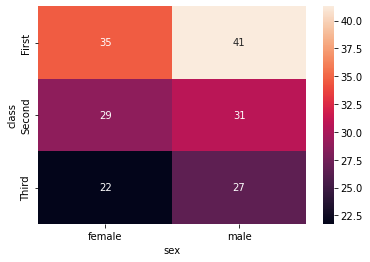

In [76]:
sns.heatmap(pdf1, annot=True)

In [77]:
# 값에 적용하는 집계 함수를 2개 이상 지정 가능 - 생존율, 생존자 수 집계
pdf2 = pd.pivot_table(df,                       # 피벗할 데이터프레임
                     index='class',             # 행 위치에 들어갈 열
                     columns='sex',             # 열 위치에 들어갈 열
                     values='survived',         # 데이터로 사용할 열
                     aggfunc=['mean', 'sum'])   # 데이터 집계 함수

print(pdf2.head())
print('\n')


            mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47




<AxesSubplot:xlabel='None-sex', ylabel='class'>

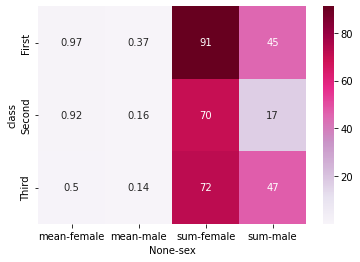

In [78]:
sns.heatmap(pdf2, annot=True, cmap="PuRd")

In [79]:
# 행, 열, 값에 사용할 열을 2개 이상 지정 가능 - 평균 나이, 최대 요금 집계
pdf3 = pd.pivot_table(df,                       # 피벗할 데이터프레임
                     index=['class', 'sex'],    # 행 위치에 들어갈 열
                     columns='survived',        # 열 위치에 들어갈 열
                     values=['age', 'fare'],    # 데이터로 사용할 열
                     aggfunc=['mean', 'max'])   # 데이터 집계 함수

# IPython Console 디스플레이 옵션 설정
pd.set_option('display.max_columns', 10)        # 출력할 열의 개수 한도
print(pdf3)
print('\n')

# 행, 열 구조 살펴보기
print(pdf3.index)
print(pdf3.columns)
print('\n')

                    mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male

<AxesSubplot:xlabel='None-None-survived', ylabel='class-sex'>

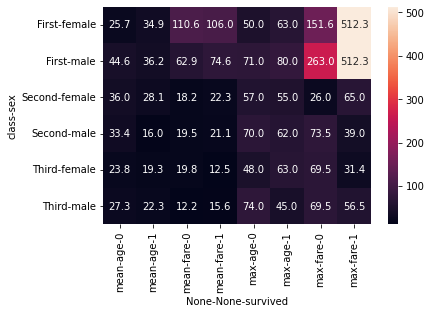

In [80]:
sns.heatmap(pdf3, annot=True, fmt='.1f')

In [81]:
# xs 인덱서 사용 - 행 선택(default: axis=0)
print(pdf3.xs('First'))              # 행 인덱스가 First인 행을 선택 
print('\n')
print(pdf3.xs(('First', 'female')))   # 행 인덱스가 ('First', 'female')인 행을 선택
print('\n')
print(pdf3.xs('male', level='sex'))  # 행 인덱스의 sex 레벨이 male인 행을 선택
print('\n')
print(pdf3.xs(('Second', 'male'), level=[0, 'sex']))  # Second, male인 행을 선택
print('\n')

               mean                                      max                \
                age                   fare               age          fare   
survived          0          1           0           1     0     1       0   
sex                                                                          
female    25.666667  34.939024  110.604167  105.978159  50.0  63.0  151.55   
male      44.581967  36.248000   62.894910   74.637320  71.0  80.0  263.00   

                    
                    
survived         1  
sex                 
female    512.3292  
male      512.3292  


            survived
mean  age   0            25.666667
            1            34.939024
      fare  0           110.604167
            1           105.978159
max   age   0            50.000000
            1            63.000000
      fare  0           151.550000
            1           512.329200
Name: (First, female), dtype: float64


               mean                                    max    

In [82]:
# xs 인덱서 사용 - 열 선택(axis=1 설정)
print(pdf3.xs('mean', axis=1))        # 열 인덱스가 mean인 데이터를 선택 
print('\n')
print(pdf3.xs(('mean', 'age'), axis=1))   # 열 인덱스가 ('mean', 'age')인 데이터 선택
print('\n')
print(pdf3.xs(1, level='survived', axis=1))  # survived 레벨이 1인 데이터 선택
print('\n')
print(pdf3.xs(('max', 'fare', 0), 
              level=[0, 1, 2], axis=1))  # max, fare, survived=0인 데이터 선택


                     age                   fare            
survived               0          1           0           1
class  sex                                                 
First  female  25.666667  34.939024  110.604167  105.978159
       male    44.581967  36.248000   62.894910   74.637320
Second female  36.000000  28.080882   18.250000   22.288989
       male    33.369048  16.022000   19.488965   21.095100
Third  female  23.818182  19.329787   19.773093   12.464526
       male    27.255814  22.274211   12.204469   15.579696


survived               0          1
class  sex                         
First  female  25.666667  34.939024
       male    44.581967  36.248000
Second female  36.000000  28.080882
       male    33.369048  16.022000
Third  female  23.818182  19.329787
       male    27.255814  22.274211


                    mean               max          
                     age        fare   age      fare
class  sex                                          
First  fe